# 05.01 Distributions

We saw measures about the data, and we saw the assumption of the standard deviation.
Why is this standard deviation thing important?
Because it describes how the data variates from the mean,
and how that moves from the mean becomes apparent if we assume that our data
can be described by a Gaussian (normal) distribution.

We import aomw of our common suspects.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

And since that normal (Gaussian) distribution is so important we shall plot it.
The equation of a normal distribution is defined in code in the
`gaussian` procedure below.
Then we perform an extensive exercise in plotting.

Note that the arguments for the `gaussian` procedure may appear strange:
we have the mean and both the standard deviation and the variance.
For a Gaussian distribution one does not need both,
one could - and probably should - calculate the standard deviation form the
variance or vice-versa.
The three arguments are included for you to play with.
In a strange world where $\sigma \neq \sqrt(\sigma^2)$ a normal
distribution will not look like a normal distribution.
Moreover, the relationship of variance and standard deviation
is what makes a normal distribution a normal distribution.
One interesting set of arguments to try may be `std=1` and `var=3`,
for a graph of a distribution that is *not* normal.

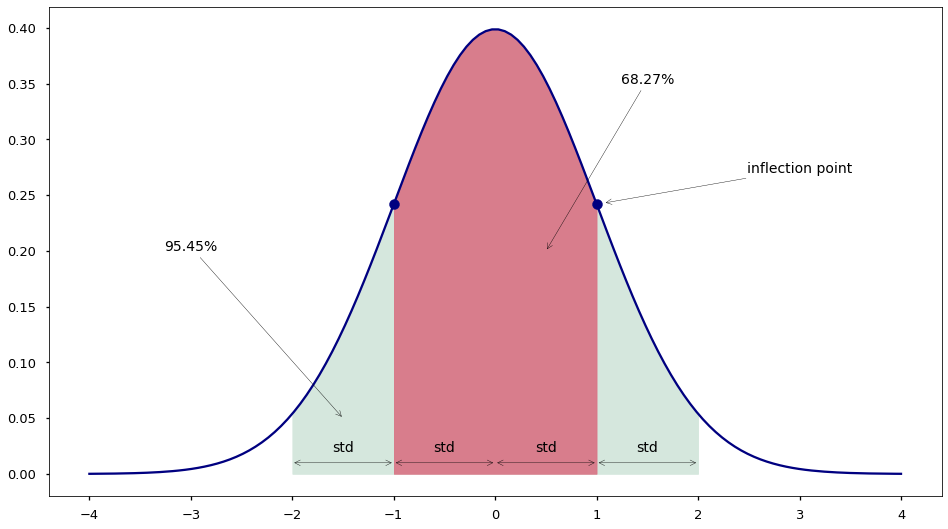

In [2]:
def gaussian(x, mean=0, std=1, var=1):
    return np.exp(-(x-mean)**2/2*var)/(np.sqrt(2*np.pi*var))

arrow = {'facecolor': 'black', 'arrowstyle': '->'}
text = {'fontsize': 14, 'ha': 'center', 'arrowprops': arrow}
fig, ax = plt.subplots(figsize=(16, 9))

x = np.linspace(-4, 4, 128)
y = gaussian(x)
ax.plot(x, y, color='navy')
x = np.linspace(-2, 2, 128)
y = gaussian(x)
ax.fill_between(x, y, alpha=0.2, color='seagreen')
ax.annotate('95.45%', xy=(-1.5, 0.05), xytext=(-3, 0.2), **text)

x = np.linspace(-1, 1, 128)
y = gaussian(x)
ax.fill_between(x, y, alpha=0.5, color='crimson')
ax.annotate('68.27%', xy=(0.5, 0.2), xytext=(1.5, 0.35), **text)

x = np.array([-1, 1])
y = gaussian(x)
ax.scatter(x, y, s=100, color='navy')
ax.annotate('inflection point', xy=(x[1]+0.07, y[1]+0.001), xytext=(3, 0.27), **text)

def plot_std(ax, xy_left, xy_right):
    arrow['arrowstyle'] = '<->'
    ax.annotate('', xy=xy_left, xytext=xy_right, **text)
    xcentre = xy_left[0] + (xy_right[0] - xy_left[0])/2
    ax.text(xcentre, xy_left[1] + 0.01, 'std', ha='center', fontsize=14)
    arrow['arrowstyle'] = '->'

plot_std(ax, (-2, 0.01), (-1, 0.01))
plot_std(ax, (-1, 0.01), (0, 0.01))
plot_std(ax, (0, 0.01), (1, 0.01))
plot_std(ax, (1, 0.01), (2, 0.01))

The areas below the curve and the inflection points vary according how the Gaussian changes.
But the relations always stay true:

- The standard deviation is the horizontal distance between the mean and the inflection point.
- The area within two standard deviations around the mean contains the majority of data.
- The area within four standard deviations contains roughly $95\%$ of the data.

But all that assumes that our data is modeled by a Gaussian distribution.
We keep repeating this, and it is time to see things that are not
modeled by a normal distribution.

The Gaussian distribution above is a continuous distribution but there are as well
discrete distributions.  The discrete equivalent to the Gaussian distribution
is the Binomial distribution, which is pretty much the histogram of a Gaussian.

Yet, other distribution exist, for example the Poisson discrete distribution
models occurrence of an event during a time period.
It models the probability of an event occurring a number of times.
Here the vertical axis is the probability of number of occurrences
$x$ ($1$ to $64$) on the horizontal axis.
The different graphs represent different variances of the event
occurrences, here variances of $1$, $5$, $10$, $30$ and $50$.
Note that the time period is not defined by the distribution,
and is required to be interpreted given a problem.

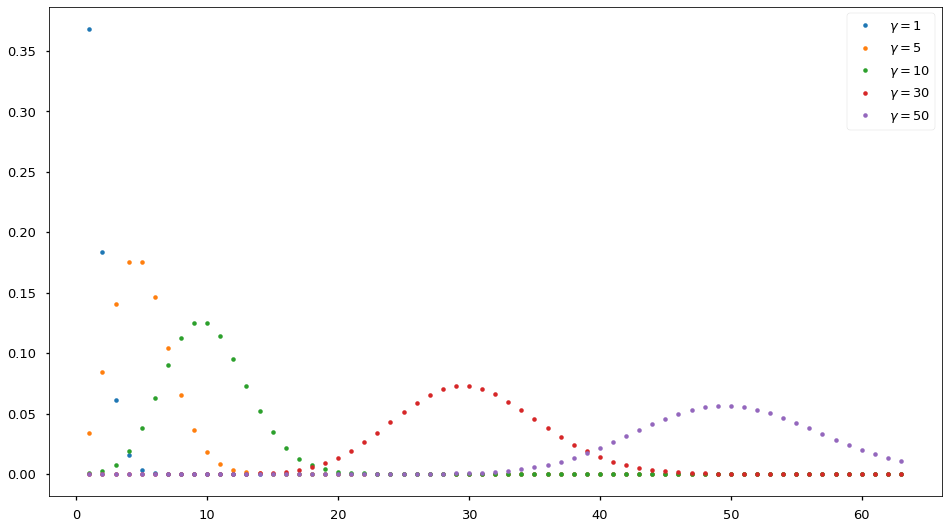

In [3]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(1, 64)
for gamma in [1, 5, 10, 30, 50]:
    y = stats.poisson.pmf(x, gamma)
    label = '$\gamma = %s$' % gamma
    ax.plot(x, y, '.', label=label)
ax.legend();

And the continuous version of the event based distribution is the Weibull distribution.
Well, to be fair the continuous version of the Poisson distribution is the exponential
distribution but the Weibull distribution is an extension to the exponential distribution.

The Weibull distribution also models the occurrence of an event in time.
Yet, Weibull is often used to get a continuous value, e.g. the occurrence of half an event.
The distribution was developed to model material failures,
where one wishes to know when an *almost* failure will occur.

The distribution has an extra parameter (here $k$) which
models for the change in the chance of a failure.
The biggest the $k$ the faster a failure may happen when time passes.

![Weibull Mountains](da-weibull.svg)

<div style="text-align:right;"><sup>da-weibull.svg</sup></div>

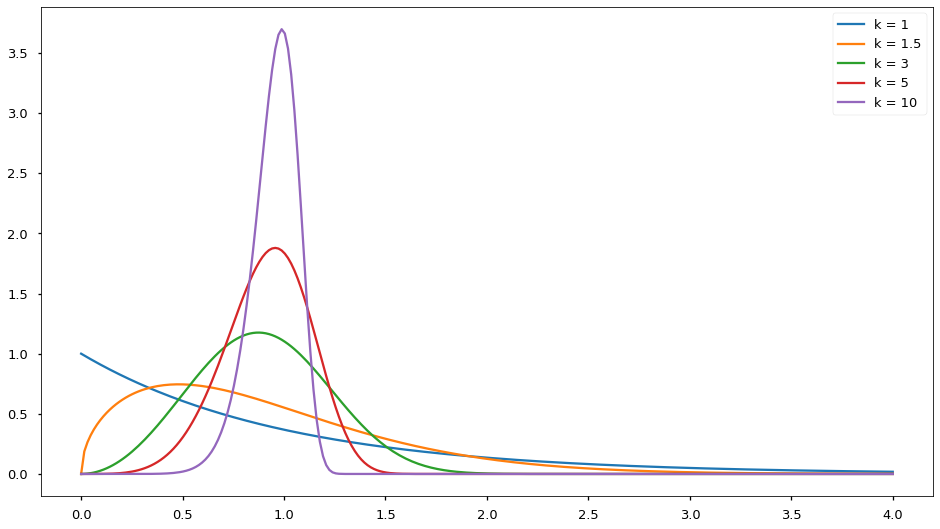

In [4]:
def weibull(x, gamma, k):
    return (k/gamma) * (x/gamma)**(k-1) * np.exp(-(x/gamma)**k)

fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(0, 4, 256)
for k in [1, 1.5, 3, 5, 10]:
    y = weibull(x, 1, k)
    label = 'k = %s' % k
    ax.plot(x, y, label=label)
ax.legend();

Therefore the data can be modeled by quite a lot of different distributions, right?
Yes.  Yet in the vast majority of cases a Gaussian distribution turns out to be the best model.
This is because the sum of several continuous distributions can be approximated as a Gaussian distribution.
In other words, when distinct processes influence the data we measure, it is likely
that we will see a Gaussian distribution.
Since each process affects the measures in a way that may result in some distribution,
a group of distinct processes will produce a sum of distinct distributions,
which tend towards a Gaussian.

That works for continuous distributions, the sum of discrete distributions vary,
yet *often* can be approximated with the Uniform distribution.

Let's try this out by summing together several Weibull distributions.
We plot here the evolution (cumulative sum) of adding more and more Weibull distributions.

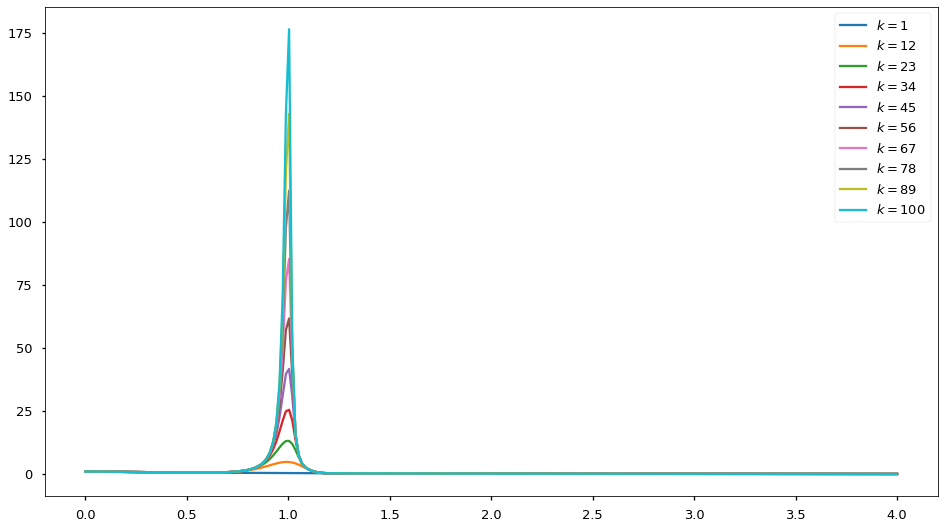

In [5]:
x = np.linspace(0, 4, 256)
y = []
fig, ax = plt.subplots(figsize=(16, 9))
ks = [1, 12, 23, 34, 45, 56, 67, 78, 89, 100]
for k in ks:
    y.append(weibull(x, 1, k))
s = np.cumsum(np.array(y), axis=0)
for k, i in zip(ks, s):
    label = '$k = %s$' % str(k)
    ax.plot(x, i, label=label)
ax.legend();

The above is often called the Central Limit Theorem in statistics.
It works in many problems allowing us to assume the normal distribution of data,
and only worry about not normally distributed data when we attempt
statistics based on a Gaussian distribution and they fail.
Most of the time we will be working with data that is generated by a complex process,
i.e. by a combination of several processes.
Therefore the Gaussian assumption and the use of standard deviation can be justified.

On the other hand the Central Limit Theorem does *not* allow us to assume
that *every* problem will be well modeled by a Gaussian distribution.
If we change the $k$ values we used for our Weibull distributions above
we can easily make a problem for which the Central Limit Theorem
doe not work.

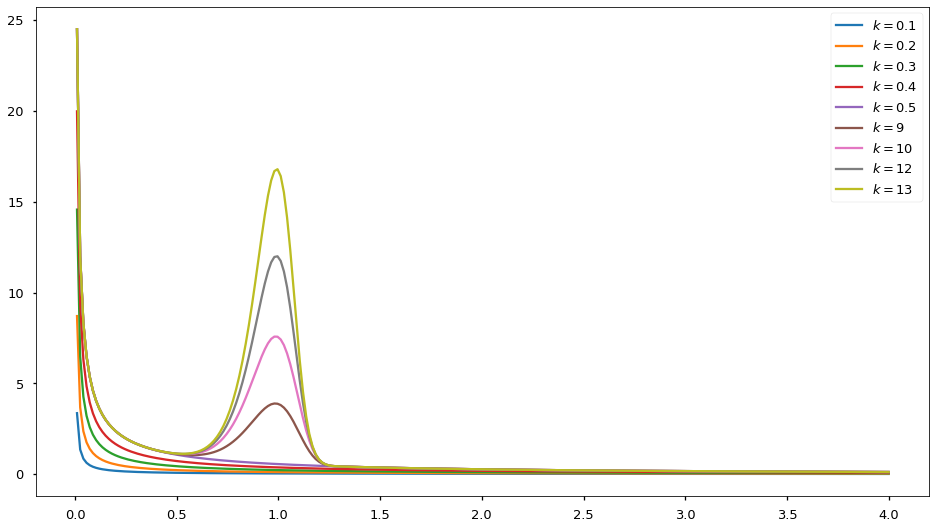

In [6]:
x = np.linspace(.01, 4, 256)
y = []
fig, ax = plt.subplots(figsize=(16, 9))
ks = [.1, .2, .3, .4, .5, 9, 10, 12, 13]
for k in ks:
    y.append(weibull(x, 1, k))
s = np.cumsum(np.array(y), axis=0)
for k, i in zip(ks, s):
    label = '$k = %s$' % str(k)
    ax.plot(x, i, label=label)
ax.legend();

Here we see a multivariate (also called a multi-modal) distribution.
Despite the fact we accumulated several processes we did not end up with
a Gaussian-like distribution.
In complex problems this may happen,
and we need to be aware of this possibility.
Moreover, there is no known *single* distribution to model this specific combination of processes.
Of course, we can model the scenario with several Weibull distributions
one fore each process we graph.
In real data we do not have access to the information of how many different process
and their nature is not available to us.
In real world data finding out the processes generating it is our task
in the first place.

Most known statistical distributions are univariate
(have a single peak),
and hence obey the Central Limit Theorem.
In this specific case the two peaks happen because we used values of $k$ below $1$,
which mean a decreasing chance of failure over time;
and values of $k$ above $1$ which mean an increasing chance over time of failure.
The difference in meaning causes an effect often called a *bifurcation*.

The take away message is that it is okay to start out with the assumption
that our data is reasonably close to a normal distribution.
But it is also important to keep at the back of one's mind the fact
that if things go wrong we may be working with a distribution of data
that is not normal in any way.
Life then becomes complicated.
Yet there are methods to work with non-normal data,
and knowing that we do not have a normal distribution is better
than attempting to square every circle just because working with circles is hard.